In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import scipy.stats as stats
import sys

sys.path.append("../")
import vuong_tests5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y

In [19]:
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    return ll1,grad1,hess1,params1,model1_fit.resid


def setup_test(yn,xn):
    lls = []
    grads = []
    hesss = []
    params = []
    resids = []
    for i in range(xn.shape[1]):
        ll,grad,hess,param,resid = setup_model(yn,xn[:,i])
        lls.append(ll)
        grads.append(grad)
        hesss.append(hess)
        params.append(param)
        resids.append(resid)
    
    #determine 1 and 2
    ind1 = 0
    ind2 = 1
    return (lls[ind1],grads[ind1],hesss[ind1],params[ind1],resids[ind1],
            lls[ind2],grads[ind2],hesss[ind2],params[ind2],resids[ind2])

def gen_data(nobs=1000, a=0.25):
    num_params=2
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs


yn,xn,nobs = gen_data()

In [20]:
def plot_true2(gen_data,setup_test,trials=500):
    llr_stats=[]
    mse_stats=[]
    for i in range(trials):
        np.random.seed()
        ys,xs,nobs = gen_data()
        ll1,grad1,hess1,params1,resid1,ll2,grad2,hess2,params2,resid2 = setup_test(ys,xs)
        
        ##Classical test
        V = vuong_tests5.compute_eigen2(ll1,grad1,hess1,params1,ll2, grad2,hess2,params2)
        llr = (ll1 - ll2).sum() +V.sum()/(2)
        omega2 = (ll1 - ll2).var() 
        nomega = np.clip( (np.sqrt(omega2*nobs)), .1,10000 )
        llr_stats.append(llr/nomega)
        
        ## MSE test
        mse = -1*(resid1**2 - resid2**2).sum()
        omega2 = (resid1**2 - resid2**2).var() 
        nomega = np.clip( (np.sqrt(omega2*nobs)), .1,10000 )
        mse_stats.append(mse/nomega)

    plt.hist(llr_stats, density=True,bins=15, label="LLR",alpha=.60)
    plt.hist(mse_stats, density=True,bins=15, label="MSE",alpha=.60)
    plt.legend()
    plt.show()
    return mse_stats,llr_stats




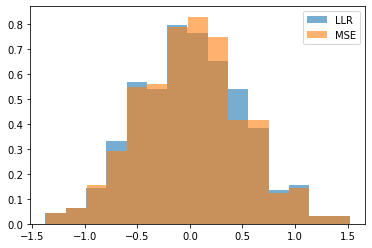

In [21]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

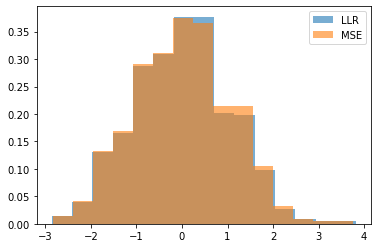

In [22]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

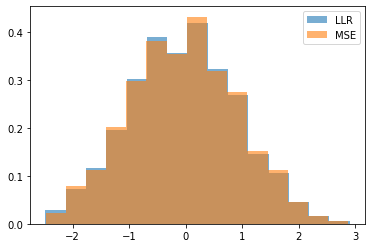

In [23]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

# Power...

In [24]:
def gen_data2(nobs=1000, a=0.25, scaler = .1):
    num_params=2
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*scaler*x[:,0] + a*x.sum(axis=1) + e 
    return y,x,nobs

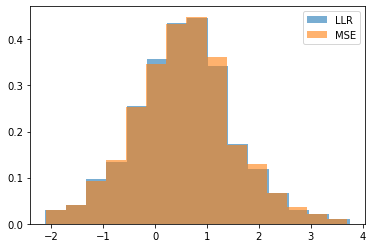

In [25]:
gen_data_ex = lambda : gen_data2(nobs=1000, a=0.25, scaler= .1)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

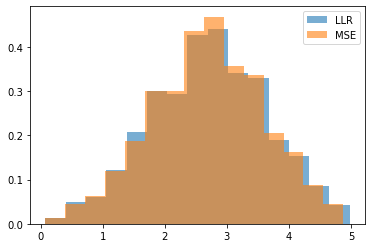

In [26]:
gen_data_ex = lambda :gen_data2(nobs=1000, a=0.25, scaler= .5)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

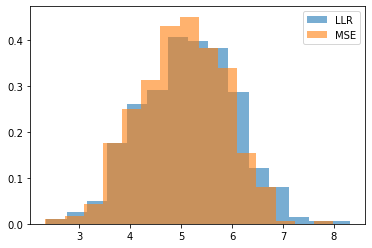

In [27]:
 gen_data_ex = lambda :gen_data2(nobs=1000, a=0.25, scaler= 1)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

# more power?

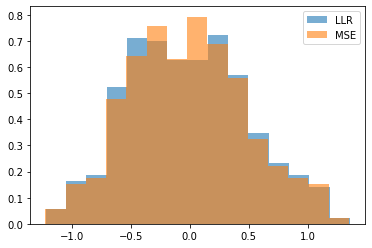

In [28]:
gen_data_ex = lambda : gen_data2(nobs=1000, a=0.0)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)

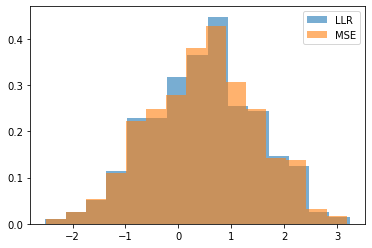

In [29]:
gen_data_ex = lambda : gen_data2(nobs=1000, a=0.25)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)


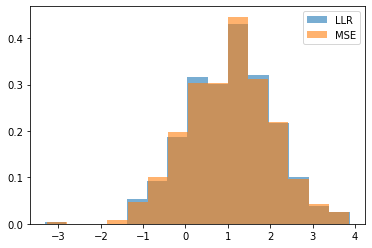

In [30]:
gen_data_ex = lambda : gen_data2(nobs=1000, a=0.5)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)


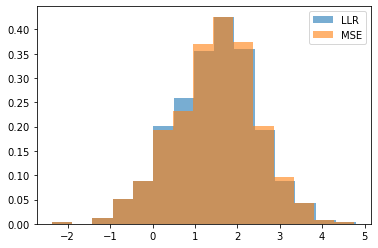

In [31]:
gen_data_ex = lambda : gen_data2(nobs=2000, a=.5)
mse_stats,llr_stats = plot_true2(gen_data_ex,setup_test)